# ML Exercise 1-2
## Question 2
By Gholamreza Dar

https://gholamrezadar.ir/

Nov 2021


Questions available at : [Github Link](https://github.com/Gholamrezadar/machine-learning-exercises/blob/main/ML-HW01.pdf)


## Loading data

In [42]:
!wget https://raw.githubusercontent.com/Gholamrezadar/machine-learning-exercises/main/dataset2/CSM_dataset.xlsx

--2021-11-26 23:21:29--  https://raw.githubusercontent.com/Gholamrezadar/machine-learning-exercises/main/dataset2/CSM_dataset.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34199 (33K) [application/octet-stream]
Saving to: ‘CSM_dataset.xlsx.1’

CSM_dataset.xlsx.1  100%[===================>]  33.40K  --.-KB/s    in 0.001s  

2021-11-26 23:21:29 (35.3 MB/s) - ‘CSM_dataset.xlsx.1’ saved [34199/34199]



In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import seaborn as sns

# Load the data using pandas
df = pd.read_excel("CSM_dataset.xlsx")

In [44]:
df.head()

,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
0,13 Sins,2014,6.3,8,9130,4000000.0,45.0,1,0,3280543,4632,425,636,1120000.0
1,22 Jump Street,2014,7.1,1,192000000,50000000.0,3306.0,2,2,583289,3465,61,186,12350000.0
2,3 Days to Kill,2014,6.2,1,30700000,28000000.0,2872.0,1,0,304861,328,34,47,483000.0
3,300: Rise of an Empire,2014,6.3,1,106000000,110000000.0,3470.0,2,0,452917,2429,132,590,568000.0
4,A Haunted House 2,2014,4.7,8,17300000,3500000.0,2310.0,2,0,3145573,12163,610,1082,1923800.0


In [45]:
# we dont need movie names
df = df.drop(columns="Movie")

In [46]:
df.describe()

,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
count,231.000000,231.000000,231.000000,2.310000e+02,2.300000e+02,221.000000,231.000000,231.000000,2.310000e+02,231.000000,231.000000,231.000000,1.960000e+02
mean,2014.294372,6.441558,5.359307,6.806603e+07,4.792173e+07,2209.244344,1.359307,2.809524,3.712851e+06,12732.536797,679.051948,1825.701299,3.038193e+06
std,0.456750,0.988765,4.141611,8.890289e+07,5.428825e+07,1463.767755,0.967241,6.996775,4.511104e+06,28825.484481,1243.929481,3571.040447,4.886278e+06
min,2014.000000,3.100000,1.000000,2.470000e+03,7.000000e+04,2.000000,1.000000,-38.000000,6.980000e+02,1.000000,0.000000,0.000000,1.066000e+03
25%,2014.000000,5.800000,1.000000,1.030000e+07,9.000000e+06,449.000000,1.000000,0.000000,6.233020e+05,1776.500000,105.500000,248.500000,1.830250e+05
50%,2014.000000,6.500000,3.000000,3.740000e+07,2.800000e+07,2777.000000,1.000000,0.000000,2.409338e+06,6096.000000,341.000000,837.000000,1.052600e+06
75%,2015.000000,7.100000,8.000000,8.935000e+07,6.500000e+07,3372.000000,1.000000,5.500000,5.217380e+06,15247.500000,697.500000,2137.000000,3.694500e+06
max,2015.000000,8.700000,15.000000,6.430000e+08,2.500000e+08,4324.000000,7.000000,29.000000,3.262678e+07,370552.000000,13960.000000,38363.000000,3.103000e+07


## Helper Functions

### Loss Functions

In [47]:
# h(theta) =  theta transpose * X
def hypothesis(X, theta):
  y1 = theta*X
  return np.sum(y1, axis=1)

# Mean Squared Error
def MSE(X, y, theta):
  y_hat = hypothesis(X, theta)
  m = len(X)
  return sum((y_hat-y)**2)/(2*m)

# Derivative of MSE
def MSE_prim(X, y, i, theta):
  y_hat = hypothesis(X, theta)
  Xi = X.iloc[:, i]
  m = len(X)
  return sum((y_hat-y) * Xi) / m

### Gradient Descent

In [48]:
def gradientDescent(X, y, theta, lr, iteration, X_valid, y_valid, loss_fn = MSE, loss_fn_prim = MSE_prim, decay=0.0):
  # Training loss per iteration history
  train_loss_history = []
  # Validation loss per iteration history
  validation_loss_history = []
  # weights progression towards the optimal value
  theta_history = []

  # Progress bar
  with tqdm(total=iteration) as pbar:
    for itera in range(iteration):

      #Learning rate decay
      lr = lr * 1/(1 + decay * itera)

      for i in range(0, len(X.columns)):
        # partial derivative of loss function with respect to Xi
        gradient = loss_fn_prim(X, y, i, theta)
        # Actual "Gradient Descent" !
        theta[i] -= lr * gradient
      
      # Calculating the loss after each iteration
      # of updating the weights using Gradient Descent
      loss = loss_fn(X, y, theta)*2
      validation_loss = loss_fn(X_valid, y_valid, theta)*2

      # Save the history of loss and weights
      validation_loss_history.append(validation_loss)
      train_loss_history.append(loss)
      theta_history.append(theta.copy())

      # Update progress bar
      pbar.update(1)

  history = {"training_loss":train_loss_history,
             "validation_loss":validation_loss_history,
             "weights":theta_history}
  # returns loss history, latest loss, weights
  print(f"training_loss : {round(train_loss_history[-1],4)} | validation_loss : {round(validation_loss_history[-1],4)}")
  return history, loss, theta

### Plotting related

In [49]:
# Correlation Matrix after dropping redundant features
def plotCorrelationMatrix(df):
  plt.figure(dpi=150)
  sns.set(font_scale=0.6)
  matrix = np.triu(df.corr()) - np.identity(df.corr().shape[0])
  hm = sns.heatmap(df.corr(), annot = True, fmt=".1g", mask=matrix)
  hm.set(title = "Correlation matrix\n")
  plt.show()

In [50]:
# Plot the relation between two features
def plotRelation(column_a, column_b):
  sns.regplot(x=df[column_a], y=df[column_b])
  plt.show()

In [51]:
# Plot a GIANT Grid of pairplots that shows how a
# feature relates to every other feature
# Note : Takes some time to render
def plotEveryPairRelation(df):
  plt.figure(dpi=72)
  sns.set(font_scale=0.6)
  sns.pairplot(df)
  plt.show()

In [52]:
# Plots validation and training losses per iteration
def plot_loss(history, title='', starting_iter=0, dpi=72):
  # Don't try this at home
  import warnings
  warnings.simplefilter(action="ignore", category=FutureWarning)
  
  fig, ax = plt.subplots()
  fig.dpi = dpi
  plt.title(title)

  # X = iterations range
  x = np.linspace(0, iterations, iterations)
  
  # 1. Training_loss - iteration curve (Red)
  sns.lineplot(x[starting_iter:], history["training_loss"][starting_iter:], color='r')
  # 2. Validation_loss - iteration curve (green)
  sns.lineplot(x[starting_iter:], history["validation_loss"][starting_iter:], color='g')

  ax.legend(labels=["training", "validation"])

  plt.show()

In [53]:
def plot_lr(lr=0.1, iterations=1000, decay=None, title='learning_rate'):
  # Don't try this at home
  import warnings
  warnings.simplefilter(action="ignore", category=FutureWarning)
  
  _lrs = []
  # Iterations
  _iterations = iterations
  # Initial lr
  _lr0 = lr
  _decay = 0
  # Decay
  if decay is None:
    _decay = _lr0/_iterations
  else:
    _decay = decay

  # Simulate gradient descents main loop
  _lr = _lr0
  for i in range(_iterations):
    _lr = _lr * 1/(1 + _decay * i)
    _lrs.append(_lr)

  _x = list(range(_iterations))
  _y = _lrs

  plt.figure()
  plt.title(title)
  plt.plot(_x, _y)
  plt.show()

## Part 1 - Missing Values

In [54]:
# show columns with missing values
has_missing = df.isna().any().loc[lambda x:x]
has_missing = has_missing.index.to_list()
has_missing

['Budget', 'Screens', 'Aggregate Followers']

#### Aggregate Followers

In [55]:
# drop aggregate followers
df = df.drop(columns=["Aggregate Followers"])


#### Budget

In [56]:
average_budget_by_genre = df.groupby(["Genre"])["Budget"].mean().to_dict()
average_budget_by_genre

{1: 83558461.53846154,
 2: 85875000.0,
 3: 22875715.451304346,
 4: 50000000.0,
 6: 31000000.0,
 7: 3650000.0,
 8: 25518301.88679245,
 9: 21384615.384615384,
 10: 21879166.666666668,
 12: 104000000.0,
 15: 11259500.0}

In [57]:
missing_budgets = df.loc[df.Budget.isna()]
missing_budgets

,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments
120,2014,7.0,8,2820000,NaN,432.0,1,0,10747,4,1,1


In [58]:
df.loc[120,"Genre"]

8

In [59]:
df.loc[120,"Budget"] = average_budget_by_genre[df.loc[120,"Genre"]]
print(f"The Budget for Movie #120 has been updated to {average_budget_by_genre[df.loc[120,'Genre']]}")

The Budget for Movie #120 has been updated to 25518301.88679245


#### Screens
Replace missing 'Screens' values with Screens Mean.

In [60]:
# total mean for screen
df.Screens.fillna(df.Screens.mean(), inplace=True)

## Part 1.5 - Standardization
small values (also from similar range) help with gradient descent's convergence.

In [61]:
# Standardize
df -= df.mean()
df /= df.std()
df.head()

,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments
0,-0.644494,-0.143167,0.637600,-0.765520,-0.808722,-1.511773,-0.371477,-0.401546,-0.095832,-0.281020,-0.204233,-0.333153
1,-0.644494,0.665923,-1.052563,1.394038,0.040141,0.766109,0.662392,-0.115700,-0.693746,-0.321505,-0.496854,-0.459166
2,-0.644494,-0.244303,-1.052563,-0.420302,-0.365837,0.462950,-0.371477,-0.401546,-0.755467,-0.430332,-0.518560,-0.498090
3,-0.644494,-0.143167,-1.052563,0.426690,1.147353,0.880666,0.662392,-0.401546,-0.722647,-0.357445,-0.439777,-0.346034
4,-0.644494,-1.761347,0.637600,-0.571028,-0.817948,0.070380,0.662392,-0.401546,-0.125752,-0.019758,-0.055511,-0.208259


## Part 1.75 - Shuffle


In [62]:
# shuffle
df = df.sample(frac=1).reset_index(drop=True)

## Part 2 - Correlations

### Correlation Matrix

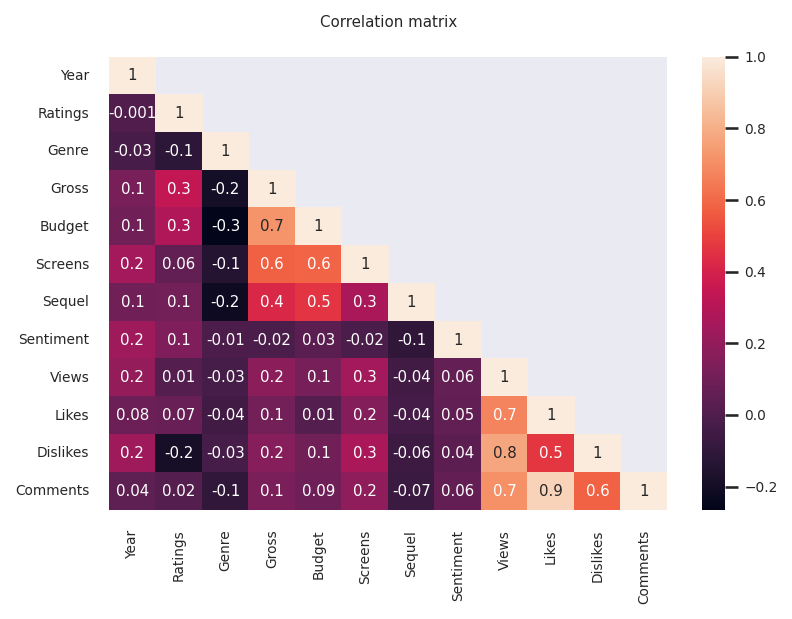

In [63]:
# Plot the correlation Matrix 
# to see which features have 
# high correlations (candidates for removing).
plotCorrelationMatrix(df)

### Correlation between two features

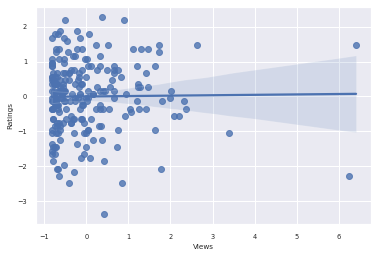

In [64]:
# We can plot the relationship between 2
# features manually to but the correlation
# matrix is faster and more clear
plotRelation("Views", "Ratings")

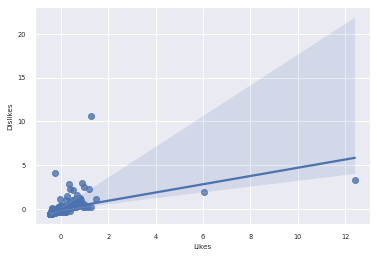

In [65]:
sns.regplot(x=df["Likes"], y=df["Dislikes"])

### Correlation between every pair

In [66]:
# Plot a GIANT Grid of pairplots that shows how a
# feature relates to every other feature
# Note : Takes some time to render
# plotEveryPairRelation(df)

## Part 3 - Remove Redundant Features


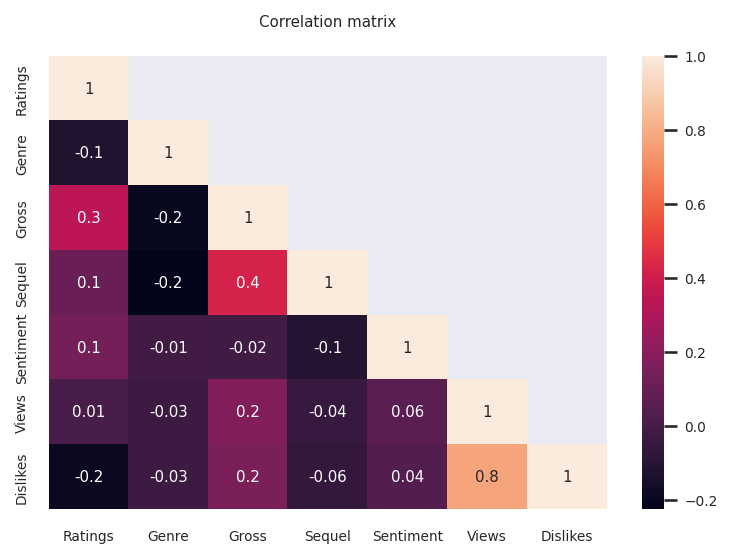

In [67]:
new_df = df.drop(columns=["Year","Comments", "Screens", "Likes", "Budget", ])
plotCorrelationMatrix(new_df)

## Part 4 - Gradient Descent

### Using the whole data

#### 1. Add column for bias

In [68]:
# 1. Add column for bias
# Add a new column for simplicity of the calculations
# acts as the bias term
df = pd.concat([pd.Series(1, index=df.index, name='0'), df], axis=1)
df.head()

,0,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments
0,1,-0.644494,0.362514,-0.569659,-0.197587,-0.679547,-0.654686,-0.371477,1.599376,1.221449,1.005897,0.196915,0.499378
1,1,1.544889,0.362514,-1.052563,0.239969,1.977763,1.081841,3.763999,-0.258623,-0.804234,-0.432518,-0.535442,-0.493610
2,1,-0.644494,1.677285,-1.052563,2.980038,2.254566,1.306765,-0.371477,-0.401546,-0.531866,-0.144509,-0.329642,-0.151413
3,1,-0.644494,-3.379527,-1.052563,-0.608147,-0.587279,-0.268403,-0.371477,-0.401546,0.420904,-0.053617,1.151149,1.615579
4,1,-0.644494,-0.042031,1.603408,0.719144,1.018179,1.214560,0.662392,0.170146,0.030351,-0.102324,0.020056,-0.188937


#### 2. Seperate X,y

In [69]:
# 2. Seperate X,y
# Split training data into X and y
X = df.drop(columns="Ratings")
y = df.loc[:, "Ratings"]
print(X.head(),end="\n\n")
print(y.head())

   0      Year     Genre     Gross  ...     Views     Likes  Dislikes  Comments
0  1 -0.644494 -0.569659 -0.197587  ...  1.221449  1.005897  0.196915  0.499378
1  1  1.544889 -1.052563  0.239969  ... -0.804234 -0.432518 -0.535442 -0.493610
2  1 -0.644494 -1.052563  2.980038  ... -0.531866 -0.144509 -0.329642 -0.151413
3  1 -0.644494 -1.052563 -0.608147  ...  0.420904 -0.053617  1.151149  1.615579
4  1 -0.644494  1.603408  0.719144  ...  0.030351 -0.102324  0.020056 -0.188937

[5 rows x 12 columns]

0    0.362514
1    0.362514
2    1.677285
3   -3.379527
4   -0.042031
Name: Ratings, dtype: float64


#### 3. Train Valid split

In [70]:
# 3. Train Valid split
# Split to train and valid
split = 0.7

X_train = X.iloc[ : int(len(X)*split),:].reset_index(drop=True)
X_valid = X.iloc[int(len(X)*split) : ,:].reset_index(drop=True)

y_train = y.iloc[ : int(len(X)*split)].reset_index(drop=True)
y_valid = y.iloc[int(len(X)*split) : ].reset_index(drop=True)

print(f"Train X size = {len(X_train)}")
print(f"Train y size = {len(y_train)}")
print(f"Valid X size = {len(X_valid)}")
print(f"Valid y size = {len(y_valid)}")

Train X size = 161
Train y size = 161
Valid X size = 70
Valid y size = 70


####4. Training

In [71]:
# 4. Gradient Descent

X_train_copy = X_train.copy()
X_valid_copy = X_valid.copy()

# Initialize the weights with random values
theta = np.random.rand(len(X_train.columns),)

theta = np.array([0.0]*len(X_train_copy.columns))

# Hyper-Parameters
iterations = 500
learning_rate = 0.0004
decay = 0

# Start the training
history, loss, theta = gradientDescent(X_train_copy,
                                       y_train,
                                       theta,
                                       learning_rate,
                                       iterations,
                                       X_valid = X_valid_copy,
                                       y_valid = y_valid,
                                       loss_fn=MSE,
                                       loss_fn_prim=MSE_prim,
                                       decay = decay)

  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.8862 | validation_loss : 0.9755


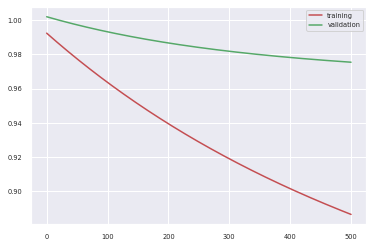

In [72]:
plot_loss(history)

In [73]:
from sklearn.linear_model import LinearRegression, SGDRegressor

reg = LinearRegression().fit(X_train_copy, y_train)

print("MSE", MSE(X_train_copy, y_train, reg.coef_)*2)
print("R2 ", reg.score(X_train_copy, y_train))

MSE 0.634163835366411
R2  0.3603436479091804


In [74]:
reg = SGDRegressor(loss='squared_error', penalty='l2', max_iter=100000, tol=1e-3)
reg.fit(X_train_copy, y_train)

print(MSE(X_train_copy, y_train, reg.coef_)*2)
print(reg.score(X_train_copy, y_train))

0.659175592626418
0.33525320021034066


### Using the selected features

#### 1. Add column for bias

In [75]:
# 1. Add column for bias
# Add a new column for simplicity of the calculations
# acts as the bias term
new_df = pd.concat([pd.Series(1, index=new_df.index, name='0'), new_df], axis=1)
new_df.head()

,0,Ratings,Genre,Gross,Sequel,Sentiment,Views,Dislikes
0,1,0.362514,-0.569659,-0.197587,-0.371477,1.599376,1.221449,0.196915
1,1,0.362514,-1.052563,0.239969,3.763999,-0.258623,-0.804234,-0.535442
2,1,1.677285,-1.052563,2.980038,-0.371477,-0.401546,-0.531866,-0.329642
3,1,-3.379527,-1.052563,-0.608147,-0.371477,-0.401546,0.420904,1.151149
4,1,-0.042031,1.603408,0.719144,0.662392,0.170146,0.030351,0.020056


#### 2. Seperate X,y

In [76]:
# 2. Seperate X,y
# Split training data into X and y
X = new_df.drop(columns="Ratings")
y = new_df.loc[:, "Ratings"]
print(X.head(),end="\n\n")
print(y.head())

   0     Genre     Gross    Sequel  Sentiment     Views  Dislikes
0  1 -0.569659 -0.197587 -0.371477   1.599376  1.221449  0.196915
1  1 -1.052563  0.239969  3.763999  -0.258623 -0.804234 -0.535442
2  1 -1.052563  2.980038 -0.371477  -0.401546 -0.531866 -0.329642
3  1 -1.052563 -0.608147 -0.371477  -0.401546  0.420904  1.151149
4  1  1.603408  0.719144  0.662392   0.170146  0.030351  0.020056

0    0.362514
1    0.362514
2    1.677285
3   -3.379527
4   -0.042031
Name: Ratings, dtype: float64


#### 3. Train Valid split

In [77]:
# # 3. Train Valid split
# Split to train and valid
split = 0.7

X_train = X.iloc[ : int(len(X)*split),:].reset_index(drop=True)
X_valid = X.iloc[int(len(X)*split) : ,:].reset_index(drop=True)

y_train = y.iloc[ : int(len(X)*split)].reset_index(drop=True)
y_valid = y.iloc[int(len(X)*split) : ].reset_index(drop=True)

print(f"Train X size = {len(X_train)}")
print(f"Train y size = {len(y_train)}")
print(f"Valid X size = {len(X_valid)}")
print(f"Valid y size = {len(y_valid)}")

Train X size = 161
Train y size = 161
Valid X size = 70
Valid y size = 70


####4. Training

In [78]:
# 4. Gradient Descent

X_train_selected = X_train.copy()
X_valid_selected = X_valid.copy()

# Initialize the weights with random values
theta = np.random.rand(len(X_train_selected.columns),)
# Initialize the weights with zeros
theta = np.array([0.0]*len(X_train_selected.columns))

# Hyper-Parameters
iterations = 500
learning_rate = 0.0004
decay = 0

# Start the training
history, loss, theta = gradientDescent(X_train_selected,
                                       y_train,
                                       theta,
                                       learning_rate,
                                       iterations,
                                       X_valid = X_valid_selected,
                                       y_valid = y_valid,
                                       loss_fn=MSE,
                                       loss_fn_prim=MSE_prim,
                                       decay = decay)

  0%|          | 0/500 [00:00<?, ?it/s]

training_loss : 0.9197 | validation_loss : 0.9676


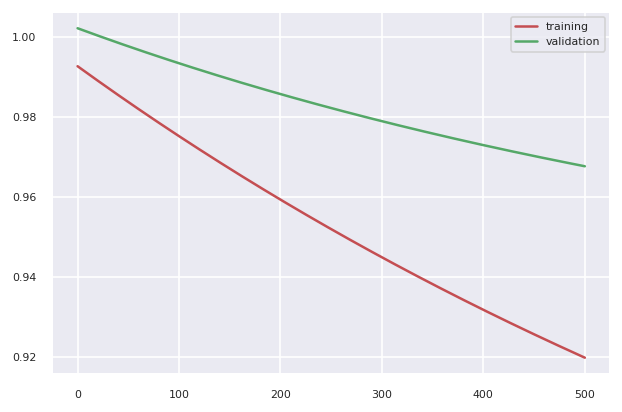

In [79]:
plot_loss(history, dpi=120)

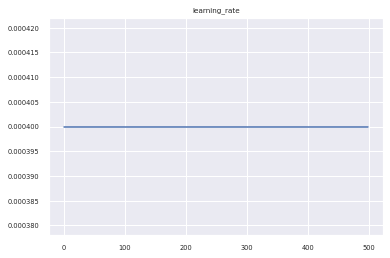

In [80]:
plot_lr(lr=learning_rate, iterations=iterations, decay=decay)

In [81]:
from sklearn.linear_model import LinearRegression, SGDRegressor
reg = LinearRegression()
reg.fit(X_train_selected, y_train)
print(MSE(X_train_selected, y_train, reg.coef_)*2)
print(reg.score(X_train_selected, y_train))

0.6859525345757836
0.30810162252464346


In [82]:
reg = SGDRegressor(loss='squared_error', penalty='l2', max_iter=100000, tol=1e-3)
reg.fit(X_train_selected, y_train)
print(MSE(X_train_selected, y_train, reg.coef_)*2)
print(reg.score(X_train_selected, y_train))

0.7200685686085881
0.2739714994477579
